In [14]:
import tensorflow as tf #linear regresstion (continuous)
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]
W = tf.Variable(2.9)
b = tf.Variable(0.5)
learning_rate = 0.01
for i in range(100+1):
    with tf.GradientTape() as tape: #tape에 내용 전달
        hypothesis = W*x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data)) #MSE
    W_grad, b_grad = tape.gradient(cost, [W, b]) #gradient 계산
    W.assign_sub(learning_rate*W_grad) #빼고 할당
    b.assign_sub(learning_rate*b_grad)
    if i%10 == 0:
        print("{:5}l{:10.4f}l{:10.4f}l{:10.6f}".format(i, W.numpy(), b.numpy(), cost))


    0l    2.4520l    0.3760l 45.660004
   10l    1.1036l    0.0034l  0.206336
   20l    1.0128l   -0.0209l  0.001026
   30l    1.0065l   -0.0218l  0.000093
   40l    1.0059l   -0.0212l  0.000083
   50l    1.0057l   -0.0205l  0.000077
   60l    1.0055l   -0.0198l  0.000072
   70l    1.0053l   -0.0192l  0.000067
   80l    1.0051l   -0.0185l  0.000063
   90l    1.0050l   -0.0179l  0.000059
  100l    1.0048l   -0.0173l  0.000055


In [18]:
print(W*5+b)
print(W*2.5+b)

tf.Tensor(5.00667, shape=(), dtype=float32)
tf.Tensor(2.4946702, shape=(), dtype=float32)


In [20]:
import numpy as np
X = np.array([1,2,3])
Y = np.array([1,2,3])
def cost_func(W,X,Y):
    hypothesis = X*W
    return tf.reduce_mean(tf.square(hypothesis-Y))
W_values = np.linspace(-3,5,num=15)
cost_values = []
for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} l {:10.5f}".format(feed_W, curr_cost))

-3.000 l   74.66667
-2.429 l   54.85714
-1.857 l   38.09524
-1.286 l   24.38095
-0.714 l   13.71429
-0.143 l    6.09524
 0.429 l    1.52381
 1.000 l    0.00000
 1.571 l    1.52381
 2.143 l    6.09524
 2.714 l   13.71429
 3.286 l   24.38095
 3.857 l   38.09524
 4.429 l   54.85714
 5.000 l   74.66667


In [32]:
tf.random.set_seed(0) #처음 실행 시 랜덤으로 나오는 W 고정
X = [1., 2., 3., 4.]
Y = [1., 2., 3., 4.]
W = tf.Variable(tf.random.normal([1], -100., 100.)) #W의차원, 범위
for step in range(300):
    hypothesis = W*X
    cost = tf.reduce_mean(tf.square(hypothesis-Y)) #차원축소
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W,X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    if step%10 == 0:
        print("{:5}l{:10.4f}l{:10.6f}".format(step, cost.numpy(), W.numpy()[0]))

    0l18829.7812l 47.348293
   10l 3959.8606l 22.254507
   20l  832.7498l 10.746942
   30l  175.1254l  5.469775
   40l   36.8285l  3.049760
   50l    7.7449l  1.939983
   60l    1.6287l  1.431060
   70l    0.3425l  1.197676
   80l    0.0720l  1.090651
   90l    0.0151l  1.041571
  100l    0.0032l  1.019064
  110l    0.0007l  1.008742
  120l    0.0001l  1.004009
  130l    0.0000l  1.001839
  140l    0.0000l  1.000843
  150l    0.0000l  1.000387
  160l    0.0000l  1.000178
  170l    0.0000l  1.000081
  180l    0.0000l  1.000037
  190l    0.0000l  1.000017
  200l    0.0000l  1.000008
  210l    0.0000l  1.000004
  220l    0.0000l  1.000002
  230l    0.0000l  1.000001
  240l    0.0000l  1.000001
  250l    0.0000l  1.000001
  260l    0.0000l  1.000001
  270l    0.0000l  1.000001
  280l    0.0000l  1.000001
  290l    0.0000l  1.000001


In [38]:
tf.random.set_seed(0) #처음 실행 시 랜덤으로 나오는 W 고정 #multivariable linear regresstion
data = np.array([
    [73., 80., 75., 152.],
    [93., 88., 93., 185.],
    [89., 91., 90., 180.],
    [96., 98., 100., 196.],
    [73., 66., 70., 142.]
], dtype=np.float32)
X = data[:, :-1]
Y = data[:,[-1]]
W = tf.Variable(tf.random.normal([3,1])) #W의차원
b = tf.Variable(tf.random.normal([1]))
def predict(X):
    return tf.matmul(X, W) + b #XW+b
n_epochs = 2000
learning_rate = 0.000001
for i in range(n_epochs+1):
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean(tf.square(predict(X)-Y))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate*W_grad)
    b.assign_sub(learning_rate*b_grad)            
    if i%100 == 0:
        print("{:5}l{:10.4f}".format(i, cost.numpy()))

    0l 1798.2894
  100l    2.2888
  200l    2.0632
  300l    2.0587
  400l    2.0542
  500l    2.0498
  600l    2.0453
  700l    2.0409
  800l    2.0366
  900l    2.0322
 1000l    2.0279
 1100l    2.0236
 1200l    2.0194
 1300l    2.0151
 1400l    2.0108
 1500l    2.0066
 1600l    2.0024
 1700l    1.9982
 1800l    1.9940
 1900l    1.9899
 2000l    1.9857


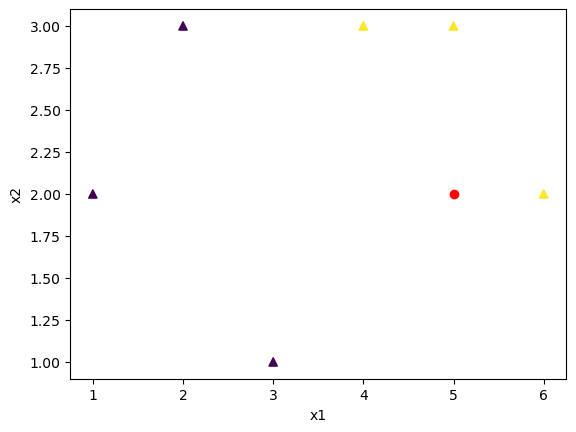

In [43]:
import matplotlib.pyplot as plt #visualization
x_train = [[1.,2.],[2.,3.],[3.,1.],[4.,3.],[5.,3.],[6.,2.]]
y_train = [[0.],[0.],[0.],[1.],[1.],[1.]]
x_test = [[5.,2.]]
y_test = [[1.]]
x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]
colors = [int(y[0]%3) for y in y_train]
plt.scatter(x1,x2,c=colors, marker='^')
plt.scatter(x_test[0][0], x_test[0][1], c='red')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [49]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)) #Binary classification with logistic regresstion (discrete)
W = tf.Variable(tf.zeros([2,1]), name = 'weight')
b = tf.Variable(tf.zeros([1]), name = 'bias')

def logistic_regression(features): #sigmoid 함수 (0부터 1까지)
    hypothesis = tf.divide(1., 1+tf.exp(-(tf.matmul(features,W)+b)))
    return hypothesis
def loss_fn(hypothesis, labels): #cost (for convex)
    cost = -tf.reduce_mean(labels*tf.math.log(hypothesis)+(1-labels)*tf.math.log(1-hypothesis))
    return cost
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32) #True면 1, False면 0 반환
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy
def grad(features, labels): #grad 구하기
    with tf.GradientTape() as tape:
        hypothesis = logistic_regression(features)
        loss_value = loss_fn(hypothesis, labels)
    return tape.gradient(loss_value, [W,b])
EPOCHS = 1001
for step in range(EPOCHS):
        for features, labels in iter(dataset.batch(len(x_train))): #실제 크기 6, 한번
            hypothesis = logistic_regression(features)
            grads = grad(features, labels)
            optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b])) #변수조정
            if step %100 == 0:
                print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(hypothesis, labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Test Result = {}".format(tf.cast(logistic_regression(x_test) > 0.5, dtype=tf.int32)))
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.5781
Iter: 200, Loss: 0.5352
Iter: 300, Loss: 0.5056
Iter: 400, Loss: 0.4840
Iter: 500, Loss: 0.4673
Iter: 600, Loss: 0.4537
Iter: 700, Loss: 0.4421
Iter: 800, Loss: 0.4320
Iter: 900, Loss: 0.4229
Iter: 1000, Loss: 0.4145
Test Result = [[1]]
Testset Accuracy: 1.0000


In [75]:
tf.random.set_seed(777)  # for reproducibility #Multiple classification with softmax
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1], #one-hot
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]] 
#convert into numpy and float format
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)
nb_classes = 3 #class의 개수입니다.
print(x_data.shape)
print(y_data.shape)
#Weight and bias setting
W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]
print(W,b)

(8, 4)
(8, 3)
<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.7706481 ,  0.37335402, -0.05576323],
       [ 0.00358377, -0.5898363 ,  1.5702795 ],
       [ 0.2460895 , -0.09918973,  1.4418385 ],
       [ 0.3200988 ,  0.526784  , -0.7703731 ]], dtype=float32)> <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([-1.3080608 , -0.13253094,  0.5513761 ], dtype=float32)>


In [76]:
def hypothesis(X): #확률값으로 변환
    return tf.nn.softmax(tf.matmul(X, W) + b)
def cost_fn(X, Y): 
    logits = hypothesis(X)
    cost = -tf.reduce_sum(Y * tf.math.log(logits), axis=1) #cross entropy 산출
    cost_mean = tf.reduce_mean(cost)
    return cost_mean
def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads
def fit(X, Y, epochs=2000, verbose=100):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)
    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
            print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))       
fit(x_data, y_data)

Loss at epoch 1: 2.849417
Loss at epoch 100: 0.684151
Loss at epoch 200: 0.613813
Loss at epoch 300: 0.558204
Loss at epoch 400: 0.508306
Loss at epoch 500: 0.461059
Loss at epoch 600: 0.415072
Loss at epoch 700: 0.369636
Loss at epoch 800: 0.324533
Loss at epoch 900: 0.280720
Loss at epoch 1000: 0.246752
Loss at epoch 1100: 0.232798
Loss at epoch 1200: 0.221645
Loss at epoch 1300: 0.211476
Loss at epoch 1400: 0.202164
Loss at epoch 1500: 0.193606
Loss at epoch 1600: 0.185714
Loss at epoch 1700: 0.178415
Loss at epoch 1800: 0.171645
Loss at epoch 1900: 0.165351
Loss at epoch 2000: 0.159483


In [77]:
sample_data = [[2,1,3,2]] # answer_label [[0,0,1]] 테스트
sample_data = np.asarray(sample_data, dtype=np.float32)
a = hypothesis(sample_data)
print(a)
print(tf.argmax(a, 1)) #index: 2 (최대값 인덱스 반환)

b = hypothesis(x_data)
print(b)
print(tf.argmax(b, 1))
print(tf.argmax(y_data, 1)) # matches with y_data 확인

tf.Tensor([[0.00112886 0.08154673 0.9173244 ]], shape=(1, 3), dtype=float32)
tf.Tensor([2], shape=(1,), dtype=int64)
tf.Tensor(
[[2.1975952e-06 1.2331170e-03 9.9876475e-01]
 [1.1288594e-03 8.1546687e-02 9.1732442e-01]
 [2.2205539e-07 1.6418624e-01 8.3581358e-01]
 [6.3921816e-06 8.5045439e-01 1.4953922e-01]
 [2.6150808e-01 7.2644734e-01 1.2044534e-02]
 [1.3783246e-01 8.6214006e-01 2.7417480e-05]
 [7.4242145e-01 2.5754160e-01 3.6978410e-05]
 [9.2197549e-01 7.8023903e-02 6.0005692e-07]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


In [81]:
tf.random.set_seed(777)
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32) #csv data load
x_data = xy[:, 0:-1] #vectorization
y_data = xy[:, -1]
nb_classes = 7  # 0 ~ 6
# Make Y data as onehot shape
Y_one_hot = tf.one_hot(y_data.astype(np.int32), nb_classes)
print(x_data.shape, Y_one_hot.shape)
#Weight and bias setting
W = tf.Variable(tf.random.normal((16, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias') #', '은 알아서 넣어짐
variables = [W, b]
def logit_fn(X): #선형변환 logit
    return tf.matmul(X, W) + b
def hypothesis(X):
    return tf.nn.softmax(logit_fn(X))
def cost_fn(X, Y):
    logits = logit_fn(X)
    cost_i = tf.keras.losses.categorical_crossentropy(y_true=Y, y_pred=logits, 
                                                      from_logits=True)    #logit을 이용해 바로 cost vector 구하기
    cost = tf.reduce_mean(cost_i)    
    return cost
def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads
def prediction(X, Y):
    pred = tf.argmax(hypothesis(X), 1) #예측레이블
    correct_prediction = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy
def fit(X, Y, epochs=1000, verbose=100):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)
    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
#             print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))
            acc = prediction(X, Y).numpy()
            loss = cost_fn(X, Y).numpy() 
            print('Steps: {} Loss: {}, Acc: {}'.format(i+1, loss, acc))
fit(x_data, Y_one_hot)

(101, 16) (101, 7)
Steps: 1 Loss: 3.635028839111328, Acc: 0.1683168262243271
Steps: 100 Loss: 0.5194158554077148, Acc: 0.7920792102813721
Steps: 200 Loss: 0.31850093603134155, Acc: 0.9108911156654358
Steps: 300 Loss: 0.23534876108169556, Acc: 0.9405940771102905
Steps: 400 Loss: 0.18872138857841492, Acc: 0.9504950642585754
Steps: 500 Loss: 0.1584603488445282, Acc: 0.9504950642585754
Steps: 600 Loss: 0.13703754544258118, Acc: 0.9900990128517151
Steps: 700 Loss: 0.12098980695009232, Acc: 0.9900990128517151
Steps: 800 Loss: 0.10847963392734528, Acc: 1.0
Steps: 900 Loss: 0.09843039512634277, Acc: 1.0
Steps: 1000 Loss: 0.09016558527946472, Acc: 1.0
